 <b><h1> News Classification and Sentiment Analysis</h1>  </b> 

<h3> Importing Libraries </h3>

In [186]:
import pandas as pd 
import numpy as np
import unicodedata
import re
from textblob import TextBlob
import nltk
from nltk.tokenize import word_tokenize
import re
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from string import punctuation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import TfidfVectorizer
from io import StringIO
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix
from nltk.sentiment.vader import SentimentIntensityAnalyzer

<h3> Importing Dataset </h3>

In [187]:
df = pd.read_csv("News_Dataset_9sector - News_Dataset_8sector.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headline     1275 non-null   object
 1   Description  1246 non-null   object
 2   Sector       1275 non-null   object
dtypes: object(3)
memory usage: 30.0+ KB


In [188]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1246 entries, 0 to 1274
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headline     1246 non-null   object
 1   Description  1246 non-null   object
 2   Sector       1246 non-null   object
dtypes: object(3)
memory usage: 38.9+ KB


In [189]:
df.head()

,Headline,Description,Sector
0,M&M announces Rs 1-lakh health insurance for n...,M&M said the plan includes a health cover of R...,auto
1,Hero MotoCorp all set to enter electric segmen...,The two-wheeler maker has tied up with Taiwan-...,auto
2,Tractor sales to be hit as second Covid wave i...,"The company, which has a joint venture with Ja...",auto
3,"Hyundai extends free service, warranty period ...",The initiative has been taken in line with the...,auto
4,ITAT rules in favour of Hero MotoCorp in an in...,The tax department had questioned certain inte...,auto


In [190]:
df['Sector'].unique()

array(['auto', 'banking', 'pharma', 'consumer product', 'energy',
       'entertainment', 'telecom', 'metal', 'infrastructure'],
      dtype=object)

In [191]:
df = df.drop_duplicates() 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 972 entries, 0 to 1274
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headline     972 non-null    object
 1   Description  972 non-null    object
 2   Sector       972 non-null    object
dtypes: object(3)
memory usage: 30.4+ KB


In [192]:
# columns = ['Headline','Description']
# X = df[columns]
# X

In [193]:
data = df['Headline']+ " " + df['Description']
len(data)

972

In [194]:
for index, value in data.items():
    print(f"Index : {index}, Value : {value}")

Index : 0, Value : M&M announces Rs 1-lakh health insurance for new tractor customers M&M said the plan includes a health cover of Rs 1 lakh through a unique COVID-19 Mediclaim policy to cover the customer in case they contract COVID-19 with home quarantine benefits.
Index : 1, Value : Hero MotoCorp all set to enter electric segment next year The two-wheeler maker has tied up with Taiwan-based Gogoro Inc to bring the latter's battery swapping platform to India.
Index : 2, Value : Tractor sales to be hit as second Covid wave impacting rural areas: Escorts The company, which has a joint venture with Japan's Kubota, is looking at around 55 per cent growth in exports in 2021-22 with Europe serving as one of the main drivers while it plans to enter markets in South East Asia and Brazil through its partner.
Index : 3, Value : Hyundai extends free service, warranty period amid COVID-19 second wave The initiative has been taken in line with the automaker's support to customers across the count

Index : 562, Value : A calamity and series of slip-ups: how ICMR took decisions aimed at building a faÃ§ade and false hope From delay in scaling up tests and ordering faulty test kits from China to sharing misleading data and approving therapies that lacked evidence, the Indian Council of Medical Research took decisions that defied the cautionary signals from global health agencies and prominent epidemiologists. This led to failure in curbing the viral outbreak.
Index : 563, Value : Viral impact: India logs the highest confirmed cases in September, but the worst may be over According to a model developed to track the outbreak, the trend in daily new confirmed Covid-19 cases shows that India may have peaked in September. There has been a reduction in new cases, and the doubling period has become longer. The recovery rate has improved, too. However, a decline may take time, and the risk of a second wave remains.
Index : 564, Value : Granules deepens US focus with differentiated products.

Index : 1073, Value : The China connection may haunt Zoom in the US and India. The app remains under scrutiny. CEO Eric Yuan has asserted that the Silicon Valley-based video-conferencing giant is an American company, but the popular app remains under scrutiny for its China policies and related privacy issues. Zoom is now moving to address those concerns, and offering end-to-end encryption to all in a step in that direction. Meanwhile, competition is also fast catching up with Zoom.  
Index : 1074, Value : Airtel Xstream Smart Stick scores on content. But lack of robust tech is playing spoilsport. Launched in September 2019, Bharti Airtel's Xstream Smart Stick enjoyed a positive response for the first three months. However, the device saw a decline in demand thereafter. A limited subscriber base, lack of value for money, and the absence of tech upgrades vis-Ã -vis its peers, Amazon and Tata Sky, are holding it back. 
Index : 1075, Value : Smart thinking, resilient networks, and luck: te

<h3> Preprocessing News Dataset </h3>

In [195]:

# from contraction import CONTRACTION_MAP

# Implementation of lower case conversion

def lower_case_convertion(text):
    """
    Input :- string
    Output :- lowercase string
    """
    lower_text = text.lower()
    return lower_text

def lemmatization(text):
    """
    Result :- string after stemming
    Input :- String
    Output :- String
    """
    # word tokenization
    tokens = word_tokenize(text)

    for index in range(len(tokens)):
        # lemma word
        lemma_word = lemma.lemmatize(tokens[index])
        tokens[index] = lemma_word

    return ' '.join(tokens)

# initialize lemmatizer object
lemma = WordNetLemmatizer()

def remove_urls(text):
    """
    Return :- String without URLs
    input :- String
    Output :- String
    """
    url_pattern = r'https?://\S+|www\.\S+'
    without_urls = re.sub(pattern=url_pattern, repl=' ', string=text)
    return without_urls

# Removing Extra Whitespaces
def remove_extra_spaces(text):
    """
    Return :- string after removing extra whitespaces
    Input :- String
    Output :- String
    """
    space_pattern = r'\s+'
    without_space = re.sub(pattern=space_pattern, repl=" ", string=text)
    return without_space

def remove_punctuation(text):
    """
    Return :- String after removing punctuations
    Input :- String
    Output :- String
    """
    return text.translate(str.maketrans('', '', punctuation))

def remove_accented_chars(text):
    new_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return new_text

def remove_numbers(text):
    # define the pattern to keep
    pattern = r'[^a-zA-z.,!?/:;\"\'\s]' 
    return re.sub(pattern, '', text)


for index, value in data.items():
    d = value
    d = lower_case_convertion(d)
    d = remove_urls(d)
    d = remove_punctuation(d)
    d = remove_extra_spaces(d)
    d = remove_accented_chars(d)
    d = lemmatization(d)
#     d = remove_numbers(d)
    data[index] = d
     




In [196]:
data

0       mm announces r 1lakh health insurance for new ...
1       hero motocorp all set to enter electric segmen...
2       tractor sale to be hit a second covid wave imp...
3       hyundai extends free service warranty period a...
4       itat rule in favour of hero motocorp in an int...
                              ...                        
1270    the long wait for light at the end of zojila t...
1271    fastag make highway journey joyful it is also ...
1272    can dilip buildcon ride out the storm the drea...
1273    lt take the road le travelled for it invit the...
1274    bharatmala head for a bumpy ride the governmen...
Length: 972, dtype: object

In [197]:
def remove_stopwords(text):
    """
    Return :- String after removing stopwords
    Input :- String
    Output :- String
    """
    text_without_sw = []
    # tokenization
    text_tokens = word_tokenize(text)
    for word in text_tokens:
        # checking word is stopword or not
        if word not in all_stopwords:
            text_without_sw.append(word)

    # joining all tokens after removing stop words
    without_sw = ' '.join(text_without_sw)
    return without_sw


In [198]:
# list of stopwords from nltk
stopwords_nltk = list(stopwords.words('english'))

# unique stopwords from all stopwords
all_stopwords = []
all_stopwords.extend(stopwords_nltk)
# all unique stop words
all_stopwords = list(set(all_stopwords))
print(f"Total number of Stopwords :- {len(all_stopwords)}")

for index, value in data.items():
    data[index] = remove_stopwords(value)
# stopword_remove_data = 

Total number of Stopwords :- 179


In [199]:
stopwords_nltk[:15]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours']

In [200]:
data

0       mm announces r 1lakh health insurance new trac...
1       hero motocorp set enter electric segment next ...
2       tractor sale hit second covid wave impacting r...
3       hyundai extends free service warranty period a...
4       itat rule favour hero motocorp inter group tra...
                              ...                        
1270    long wait light end zojila tunnel donaTMt blam...
1271    fastag make highway journey joyful also turnin...
1272    dilip buildcon ride storm dream run stock suff...
1273    lt take road le travelled invit infrastructure...
1274    bharatmala head bumpy ride government showpiec...
Length: 972, dtype: object

In [201]:
data[1]

'hero motocorp set enter electric segment next year twowheeler maker ha tied taiwanbased gogoro inc bring latter battery swapping platform india'

In [202]:
# Y = df['Sector']

<h3> Sector-wise News </h3>

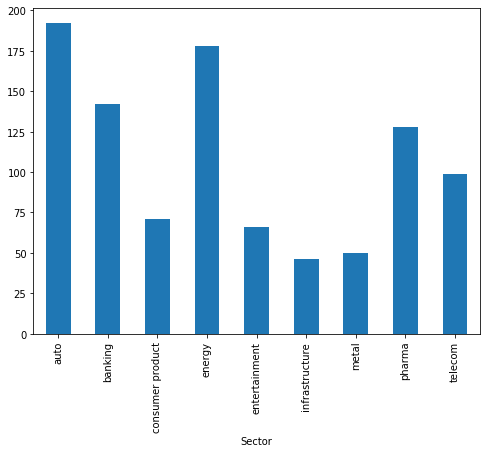

In [203]:

fig = plt.figure(figsize=(8,6))
df.groupby('Sector').Headline.count().plot.bar(ylim=0)
plt.show()

<h3> Assigning a category id to each sector </h3>

In [204]:

df['category_id'] = df['Sector'].factorize()[0]
category_id_df = df[['Sector', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Sector']].values)
df.tail()


,Headline,Description,Sector,category_id
1270,The long wait for light at the end of Zojila t...,"With cost overruns of INR1.45 lakh crore, one ...",infrastructure,8
1271,FASTag makes highway journeys joyful. It is al...,"Armed with goodies, the government is aiming t...",infrastructure,8
1272,Can Dilip Buildcon ride out the storm?,The dream run of the stock suffered a sudden j...,infrastructure,8
1273,L&T takes the road less travelled for its InvIT,"The infrastructure major, unlike its peers, is...",infrastructure,8
1274,Bharatmala heads for a bumpy ride,The government's showpiece infrastructure proj...,infrastructure,8


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 972 entries, 0 to 1274
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headline     972 non-null    object
 1   Description  972 non-null    object
 2   Sector       972 non-null    object
 3   category_id  972 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 78.0+ KB


<h3> Sector Category to Sector ID </h3>

In [206]:
category_to_id

{'auto': 0,
 'banking': 1,
 'pharma': 2,
 'consumer product': 3,
 'energy': 4,
 'entertainment': 5,
 'telecom': 6,
 'metal': 7,
 'infrastructure': 8}

In [207]:
id_to_category

{0: 'auto',
 1: 'banking',
 2: 'pharma',
 3: 'consumer product',
 4: 'energy',
 5: 'entertainment',
 6: 'telecom',
 7: 'metal',
 8: 'infrastructure'}

In [208]:
df['merged'] = data

In [209]:
df.reset_index(drop=True, inplace=True)

<h3> Term Frequency-Inverse Document Frequency(TF-IDF) Scheme </h3>

In [210]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.merged).toarray()
labels = df.category_id
features.shape

(972, 1392)

In [211]:
features

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.17048533],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [212]:
N = 2
for Product, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
#     trigrams = [v for v in feature_names if len(v.split(' ')) == 3]
    print("# '{}':".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))
#     print("  . Most correlated trigrams:\n. {}".format('\n. '.join(trigrams[-N:])))

# 'auto':
  . Most correlated unigrams:
. vehicle
. airline
  . Most correlated bigrams:
. maruti suzuki
. tata motor
# 'banking':
  . Most correlated unigrams:
. rbi
. bank
  . Most correlated bigrams:
. bank said
. idbi bank
# 'consumer product':
  . Most correlated unigrams:
. fmcg
. hul
  . Most correlated bigrams:
. fourth quarter
. sanjiv mehta
# 'energy':
  . Most correlated unigrams:
. oil
. power
  . Most correlated bigrams:
. diesel price
. petrol diesel
# 'entertainment':
  . Most correlated unigrams:
. multiplex
. cinema
  . Most correlated bigrams:
. star india
. cinema hall
# 'infrastructure':
  . Most correlated unigrams:
. highway
. road
  . Most correlated bigrams:
. ha set
. business model
# 'metal':
  . Most correlated unigrams:
. insolvency
. steel
  . Most correlated bigrams:
. coal india
. company said
# 'pharma':
  . Most correlated unigrams:
. drug
. vaccine
  . Most correlated bigrams:
. bharat biotech
. covid19 vaccine
# 'telecom':
  . Most correlated unigrams

<h3> Splitting the data into train and test data set </h3>

In [258]:
X_train, X_test, y_train, y_test = train_test_split(df['merged'], df['Sector'],test_size=0.15, random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [214]:
X_train_counts.shape

(826, 7332)

In [215]:
# print(clf.predict(count_vect.transform([""])))

<h3> Training on different ML models </h3>

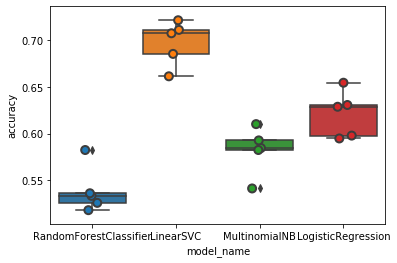

In [216]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

<h3> Accuracy of different ML models</h3>

In [217]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.697557
LogisticRegression        0.621417
MultinomialNB             0.582273
RandomForestClassifier    0.539122
Name: accuracy, dtype: float64

<h3> Linear SVC </h3>

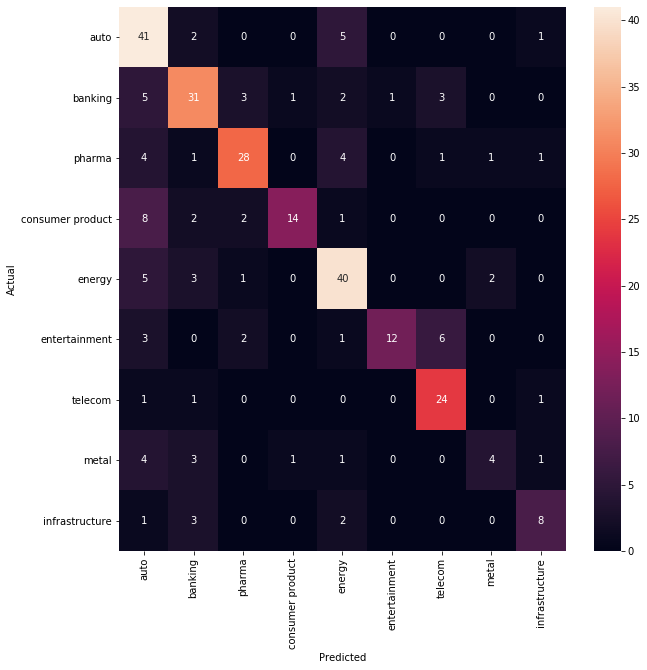

In [218]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.3, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Sector.values, yticklabels=category_id_df.Sector.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [219]:
X_test.shape

(292, 1392)

In [220]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Sector'].unique()))

                  precision    recall  f1-score   support

            auto       0.57      0.84      0.68        49
         banking       0.67      0.67      0.67        46
          pharma       0.78      0.70      0.74        40
consumer product       0.88      0.52      0.65        27
          energy       0.71      0.78      0.75        51
   entertainment       0.92      0.50      0.65        24
         telecom       0.71      0.89      0.79        27
           metal       0.57      0.29      0.38        14
  infrastructure       0.67      0.57      0.62        14

        accuracy                           0.69       292
       macro avg       0.72      0.64      0.66       292
    weighted avg       0.71      0.69      0.69       292



In [221]:
X_train, X_test, y_train, y_test = train_test_split(df['merged'], df['category_id'],test_size=0.15, random_state = 0)

In [222]:
y_pred = model.predict(tfidf.transform(X_test))


In [223]:
sent = pd.DataFrame({
    'News':X_test,
    'Sector':y_pred
})
sent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 935 to 625
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   News    146 non-null    object
 1   Sector  146 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ KB


In [224]:
sent.head(10)

,News,Sector
935,hit miss pandemic oil volatility may leave lt ...,4
279,indusind bank md plan sell share held via prev...,1
14,bosch suspends production nashik plant till ma...,0
682,eex market leader japan power future first yea...,4
458,fmcg retailer rethink assortment play pandemic...,3
674,chandigarh seek police protection installation...,4
686,south africa eskom cut electricity nationwide ...,4
836,satcom need continuously examine security chal...,1
379,le 2 pc population affected covid india 98 pc ...,2
558,india set gas exchange marketlinked pricing ca...,4


In [225]:
sent['Sector'] = sent['Sector'].map(id_to_category)
sent[7:12]

,News,Sector
836,satcom need continuously examine security chal...,banking
379,le 2 pc population affected covid india 98 pc ...,pharma
558,india set gas exchange marketlinked pricing ca...,energy
31,ev space see top level hiring fill new technol...,auto
883,iffco warns public fake firm fertilizer french...,auto


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headline     972 non-null    object
 1   Description  972 non-null    object
 2   Sector       972 non-null    object
 3   category_id  972 non-null    int64 
 4   merged       972 non-null    object
dtypes: int64(1), object(4)
memory usage: 38.1+ KB


In [227]:
news = []
sect = []
for index,value in sent.iterrows():
    print(index)
    print("{} : ".format(value['Sector']))
    print(value['News'])
    print("\n")
    news.append(df['Headline'].iloc[index])
    sect.append(df['Sector'].iloc[index])

935
energy : 
hit miss pandemic oil volatility may leave lt third time unlucky meeting lakshya lt seemed sailing smoothly towards 2021 lakshya 30 target came doublewhammy crude price crashing multiyear low thereby denting revenue middle east pandemic bringing economy halt engineering giant face slippery slope


279
banking : 
indusind bank md plan sell share held via previous esop md ceo indusind bank sumant kathpalia plan sell share bank previous employee stock option esop


14
auto : 
bosch suspends production nashik plant till may 23 company nashik plant caters common rail system key portfolio injector nozzle passenger car heavy commercial vehicle tractor segment


682
energy : 
eex market leader japan power future first year harsh weather highlighted japan reliance gas import power nuclear renewables provide enough supply


458
consumer product : 
fmcg retailer rethink assortment play pandemic impact supply chain dynamic report januarymarch 2021 period fmcg sale growth traditional 

nclt admits cox king financial service insolvency resolution second listed firm promoted ajay kerkar admitted corporate insolvency resolution process cirp since flagship firm travel company cox king ltd also going insolvency resolution process


255
banking : 
microfinance institution want rbi industry association sadhan ha sought emergency credit line member 25 outstanding loan lending bank


886
auto : 
vedanta sterlite copper dispatch first batch medicalgrade oxygen tuticorin athe first tanker carrying 48 tonne liquid oxygen going tirunelveli thoothukudi dispatching two oxygen tanker daily basis begin gradually scale expand productiona company said statement thursday


929
infrastructure : 
margin fat order book tracking gr infraaTMs journey village road highway company gr infraprojectsaTM size call refrain taking lowmargin order ha always tough company sticking gun even fy12fy15 revenue stagnated profit shrunk investor didnt lose faith financial discipline management whataTMs secre

896
energy : 
cidco build 2000bed covid care centre mumbaiaTMs kanjurmarg suburb proposed centre set old crompton greave factory land 1400 oxygenated 200 icu 400 nonoxygenated bed covid19 patient cidco usually mandated assignment outside mumbai particularly navi mumbai ha entrusted job fasttrack construction jumbo covid care centre mumbai


837
telecom : 
jio top 4g download speed vodafone upload april trai jio ha almost three time higher download speed compared closest competitor vodafone


911
metal : 
jsw steel sign mou jfe steel manufacture grainoriented electrical steel plan complete study within current 2021 fiscal year take appropriate step set jv company subject requisite approval jsw steel expects electrical steel growth demand increase coming year


362
pharma : 
delhi govt set panel timely distribution amphotericinb injection hospital hospital delhi reported rise number back fungus case among people recovering covid19 second wave could ascribed irrational use steroid home wi


893
consumer product : 
mining construction equipment industry may grow 1520 2021 icra overall equipment demand strong 2021 partly due low base 2020 volatility demand likely strong first quarter relatively subdued second quarter grip second wave emission related prebuy pickup postbuy slump third fourth quarter 2021


834
telecom : 
operator urge state prioritise vaccine telecom maintenance worker acoai ha sought support state government andhra pradesh telangana karnataka tamil nadu kerala maharashtra uttar pradesh bihar madhya pradesh gujarat west bengal punjab haryana jammu kashmir himachal pradesh etc consider telecom field employee frontline worker consider priority list getting vaccinationa said


202
telecom : 
indiaaTMs demographic dividend ha doomy message thereaTMs big hole employability education timeaTMs running india take advantage young population smaller dependent population larger workingage population 2031 however trend reverse 2041 india take advantage young population

In [228]:
dataframe = pd.DataFrame({
    'News' : news,
    'Orig Sector' : y_test,
    'Pred Sector':y_pred
})
dataframe['Orig Sector'] = dataframe['Orig Sector'].map(id_to_category)
dataframe['Pred Sector'] = dataframe['Pred Sector'].map(id_to_category)

dataframe.head(10)

,News,Orig Sector,Pred Sector
935,"Hit or miss: why pandemic, oil volatility may ...",infrastructure,energy
279,IndusInd Bank MD plans to sell some shares hel...,banking,banking
14,Bosch suspends production at Nashik plant till...,auto,auto
682,EEX market leader in Japan power futures after...,energy,energy
458,FMCG retailers rethink assortment play as pand...,consumer product,consumer product
674,Chandigarh seeks police protection for install...,energy,energy
686,South Africa's Eskom to cut electricity nation...,energy,energy
836,SatCom: Need to continuously examine security ...,telecom,banking
379,Less than 2 pc population affected by COVID in...,pharma,pharma
558,India to set up gas exchange for market-linked...,energy,energy


<h3>Correctly Classified News</h3>

In [229]:
for index,value in dataframe.iterrows():
    if value['Orig Sector'] == value['Pred Sector']:
        print("{} : {}".format(value['Orig Sector'],value['News']))

banking : IndusInd Bank MD plans to sell some shares held via previous ESOP
auto : Bosch suspends production at Nashik plant till May 23
energy : EEX market leader in Japan power futures after first year
consumer product : FMCG retailers rethink assortment play as pandemic impacts supply chain dynamics: Report
energy : Chandigarh seeks police protection for installation of smart power meters in villages
energy : South Africa's Eskom to cut electricity nationwide after breakdowns at 7 power plants
pharma : Less than 2 pc population affected by COVID in India, 98 pc still vulnerable: Govt
energy : India to set up gas exchange for market-linked pricing. Caution: deregulation has its own perils.
auto : EV space sees top level hiring to fill up new technology advancements
consumer product : HUL's Sudhir Sitapati to step down as Executive Director
entertainment : Exhibitors welcome govt decision to allow 100 percent occupancy
energy : Brazil fund Perfin to invest $1 bln in renewables, mainly

<h3>Falsely Classified News</h3>

In [230]:
for index,value in dataframe.iterrows():
    if value['Orig Sector'] != value['Pred Sector']:
        print("{} : {} : {}".format(value['Pred Sector'],value['News'],value['Orig Sector']))

energy : Hit or miss: why pandemic, oil volatility may leave L&T third time unlucky in meeting its Lakshya : infrastructure
banking : SatCom: Need to continuously examine security challenges, says Ajay Kumar : telecom
auto : IFFCO warns public against fake firm Fertilizer Frenchie offering dealership, franchise : metal
pharma : SAJA advises news organisations against using 'India variant' term for new COVID-19 strain : entertainment
pharma : Wiley remains committed to expand open access offerings in 'legally, sustainable' way : entertainment
energy : What crypto insiders think about Elon Muskâ€™s bitcoin U-turn : banking
auto : FELUDA kit more expensive, hence not as popular as RTPCR: ICMR to HC : pharma
auto : MoEVing partners Hero Electric to accelerate affordable EV adoption : energy
banking : Jaypee Infra insolvency: NBCC, Suraksha submit revised bids : metal
banking : Cairn identifies $70 bn Indian assets for seizing to recover amount due from govt : energy
pharma : Over half of F

In [231]:
grouped = dataframe.groupby("Pred Sector")
# grouped.to_csv("test.csv")

In [232]:
i = 0
for name, group in grouped:
    print("i : {} -> {}".format(i,name))
    i+=1

i : 0 -> auto
i : 1 -> banking
i : 2 -> consumer product
i : 3 -> energy
i : 4 -> entertainment
i : 5 -> infrastructure
i : 6 -> metal
i : 7 -> pharma
i : 8 -> telecom


<h3> Energy News Sentiment Analysis </h3>

In [233]:
energy_news  = []
ind = []
for name, group in grouped:
    if(name == 'energy'):
        for row_index, row in group.iterrows():
            energy_news .append(row['News'])
            print(row['News'])
#             print(index)
#             print("\n")
            ind.append(index)

Hit or miss: why pandemic, oil volatility may leave L&T third time unlucky in meeting its Lakshya
EEX market leader in Japan power futures after first year
Chandigarh seeks police protection for installation of smart power meters in villages
South Africa's Eskom to cut electricity nationwide after breakdowns at 7 power plants
India to set up gas exchange for market-linked pricing. Caution: deregulation has its own perils.
Brazil fund Perfin to invest $1 bln in renewables, mainly solar
What crypto insiders think about Elon Muskâ€™s bitcoin U-turn
Asia snubs IEA's call to stop new fossil fuel investments
UP women manufacture solar lamps for kids
An INR9 lakh crore lure could make India go back on its EV pledge
Power consumption grows nearly 19 per cent in 1st fortnight of May
Oil canâ€™t be on Indiaâ€™s Atmanirbhar list: blame ageing wells, glacial pace of new discovery
Populism over business prudence: how low tariff capped Indiaâ€™s solar ambition
India needs multi-airport systems to ma

In [234]:
energy_news = pd.DataFrame({
    'Descr' : energy_news 
})

In [235]:
energy_news 

,Descr
0,"Hit or miss: why pandemic, oil volatility may ..."
1,EEX market leader in Japan power futures after...
2,Chandigarh seeks police protection for install...
3,South Africa's Eskom to cut electricity nation...
4,India to set up gas exchange for market-linked...
5,Brazil fund Perfin to invest $1 bln in renewab...
6,What crypto insiders think about Elon Muskâ€™s...
7,Asia snubs IEA's call to stop new fossil fuel ...
8,UP women manufacture solar lamps for kids
9,An INR9 lakh crore lure could make India go ba...


In [236]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
      return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
      return  TextBlob(text).sentiment.polarity

In [237]:
energy_news ['Subjectivity'] = energy_news ['Descr'].apply(getSubjectivity)
energy_news ['Polarity'] = energy_news ['Descr'].apply(getPolarity)
energy_news 

,Descr,Subjectivity,Polarity
0,"Hit or miss: why pandemic, oil volatility may ...",0.000000,0.000000
1,EEX market leader in Japan power futures after...,0.333333,0.250000
2,Chandigarh seeks police protection for install...,0.642857,0.214286
3,South Africa's Eskom to cut electricity nation...,0.000000,0.000000
4,India to set up gas exchange for market-linked...,1.000000,0.600000
5,Brazil fund Perfin to invest $1 bln in renewab...,0.333333,0.166667
6,What crypto insiders think about Elon Muskâ€™s...,0.000000,0.000000
7,Asia snubs IEA's call to stop new fossil fuel ...,0.454545,0.136364
8,UP women manufacture solar lamps for kids,0.000000,0.000000
9,An INR9 lakh crore lure could make India go ba...,0.000000,0.000000


In [238]:
ind = []
for index,value in energy_news .iterrows():
    if value['Polarity'] > 0.2:
        print("Polarity : {} - {} ".format(value['Polarity'],value['Descr']))
        print("\n")
        ind.append(index)

Polarity : 0.25 - EEX market leader in Japan power futures after first year 


Polarity : 0.21428571428571427 - Chandigarh seeks police protection for installation of smart power meters in villages 


Polarity : 0.6 - India to set up gas exchange for market-linked pricing. Caution: deregulation has its own perils. 


Polarity : 0.5 - India climbs to 3rd spot on EY index on impressive show by solar PV segment 


Polarity : 0.25 - U.S. shale oil output to climb for first time in 3 months in June - EIA 


Polarity : 0.5 - Oil and gas companies most committed to radical reinvention amid Covid: Accenture report 


Polarity : 0.55 - Australia to spend $468 million on controversial gas-fired power plant 




In [239]:
ind = []
for index,value in energy_news .iterrows():
    if value['Polarity'] < 0:
        print("Polarity : {} - {} ".format(value['Polarity'],value['Descr']))
        print("\n")
        ind.append(index)

Polarity : -0.6999999999999998 - Whatâ€™s building up in Indiaâ€™s wavering power sector? Tottering piles of bad debt at PFC 


Polarity : -0.17857142857142858 - Cairn Oil & Gas starts production from tight oil project in Rajasthan 


Polarity : -0.024999999999999994 - Average spot power price up nearly 53 pc to Rs 3.70/unit in April at IEX 


Polarity : -0.30000000000000004 - Tesla could start slow in India, but donâ€™t conclude yet. Hint: Read the Apple, Amazon stories. 


Polarity : -0.06818181818181818 - No new fossil fuel projects for net-zero 2050 goal: IEA 




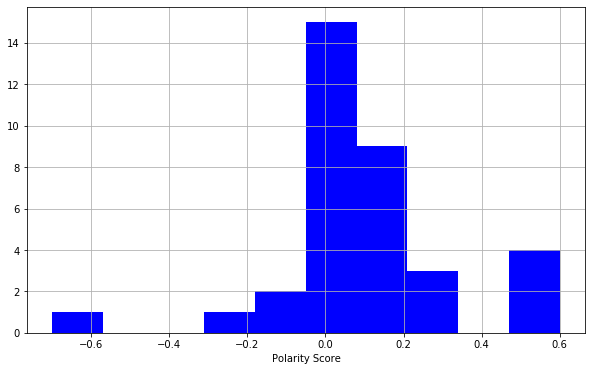

In [240]:
plt.figure(figsize = (10,6))
plt.ylabel('')
plt.xlabel('Polarity Score')
energy_news ['Polarity'].hist(color = 'blue')

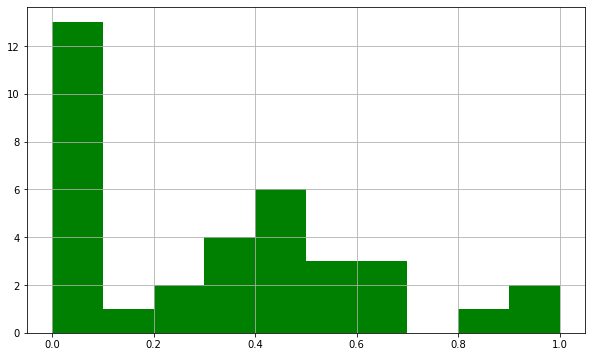

In [241]:

plt.figure(figsize = (10,6))
energy_news ['Subjectivity'].hist(color = 'green')

In [242]:

sia = SentimentIntensityAnalyzer()

energy_news ['Compound'] = [sia.polarity_scores(v)['compound'] for v in energy_news ['Descr']]
energy_news ['Negative'] = [sia.polarity_scores(v)['neg'] for v in energy_news ['Descr']]
energy_news ['Neutral'] = [sia.polarity_scores(v)['neu'] for v in energy_news ['Descr']]
energy_news ['Positive'] = [sia.polarity_scores(v)['pos'] for v in energy_news ['Descr']]
energy_news 

,Descr,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,"Hit or miss: why pandemic, oil volatility may ...",0.000000,0.000000,-0.2023,0.157,0.843,0.000
1,EEX market leader in Japan power futures after...,0.333333,0.250000,0.0000,0.000,1.000,0.000
2,Chandigarh seeks police protection for install...,0.642857,0.214286,0.4019,0.000,0.803,0.197
3,South Africa's Eskom to cut electricity nation...,0.000000,0.000000,-0.2732,0.160,0.840,0.000
4,India to set up gas exchange for market-linked...,1.000000,0.600000,0.0000,0.000,1.000,0.000
5,Brazil fund Perfin to invest $1 bln in renewab...,0.333333,0.166667,0.0000,0.000,1.000,0.000
6,What crypto insiders think about Elon Muskâ€™s...,0.000000,0.000000,0.0000,0.000,1.000,0.000
7,Asia snubs IEA's call to stop new fossil fuel ...,0.454545,0.136364,-0.6486,0.398,0.602,0.000
8,UP women manufacture solar lamps for kids,0.000000,0.000000,0.0000,0.000,1.000,0.000
9,An INR9 lakh crore lure could make India go ba...,0.000000,0.000000,0.0000,0.000,1.000,0.000


<h3> Pharma News Sentiment Analysis </h3>

In [243]:
pharma_news = []
for name, group in grouped:
    if(name == 'pharma'):
        for row_index, row in group.iterrows():
            pharma_news.append(row['News'])
#             print(row['News'])

In [244]:
pharma_news

['Less than 2 pc population affected by COVID in India, 98 pc still vulnerable: Govt',
 "SAJA advises news organisations against using 'India variant' term for new COVID-19 strain",
 "Wiley remains committed to expand open access offerings in 'legally, sustainable' way",
 'Cipla says supply of COVID-19 drug remdesivir catching up with demand',
 'As India eyes Sputnik rollout, experts question efficacy data',
 'Over half of FY21 Covid mediclaims filed in just six weeks',
 'American vaccines effective against Covid strain first found in India: US officials',
 "Rajnath Singh to release first batch of DRDO's 2DG medicine for treating COVID-19 patients today",
 'Alembic Pharma gets USFDA nod for bipolar depression drug',
 "Indian variant's transmissibility edge might be smaller than feared, UK expert says",
 "Booster effect even at six months, don't worry: Experts on Covishield dose gap",
 'Delhi govt sets up panel for timely distribution of Amphotericin-B injection to hospitals',
 'From In

In [245]:
pharma_news = pd.DataFrame({
    'Descr' : pharma_news
})

In [246]:
pharma_news

,Descr
0,Less than 2 pc population affected by COVID in...
1,SAJA advises news organisations against using ...
2,Wiley remains committed to expand open access ...
3,Cipla says supply of COVID-19 drug remdesivir ...
4,"As India eyes Sputnik rollout, experts questio..."
5,Over half of FY21 Covid mediclaims filed in ju...
6,American vaccines effective against Covid stra...
7,Rajnath Singh to release first batch of DRDO's...
8,Alembic Pharma gets USFDA nod for bipolar depr...
9,Indian variant's transmissibility edge might b...


In [247]:
pharma_news['Subjectivity'] = pharma_news['Descr'].apply(getSubjectivity)
pharma_news['Polarity'] = pharma_news['Descr'].apply(getPolarity)
pharma_news

,Descr,Subjectivity,Polarity
0,Less than 2 pc population affected by COVID in...,0.283333,-0.333333
1,SAJA advises news organisations against using ...,0.454545,0.136364
2,Wiley remains committed to expand open access ...,0.350000,0.100000
3,Cipla says supply of COVID-19 drug remdesivir ...,0.900000,0.600000
4,"As India eyes Sputnik rollout, experts questio...",0.000000,0.000000
5,Over half of FY21 Covid mediclaims filed in ju...,0.166667,-0.166667
6,American vaccines effective against Covid stra...,0.377778,0.283333
7,Rajnath Singh to release first batch of DRDO's...,0.333333,0.250000
8,Alembic Pharma gets USFDA nod for bipolar depr...,0.000000,0.000000
9,Indian variant's transmissibility edge might b...,0.500000,0.000000


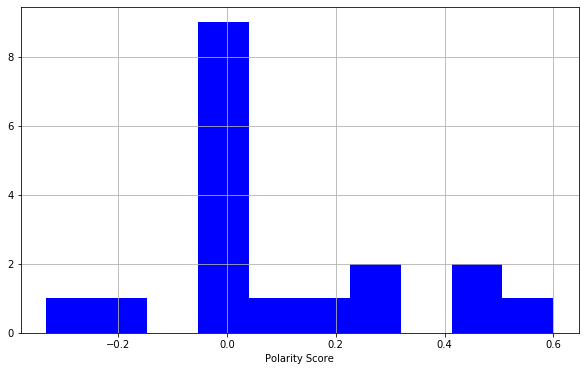

In [248]:
plt.figure(figsize = (10,6))
plt.xlabel('Polarity Score')
pharma_news['Polarity'].hist(color = 'blue')

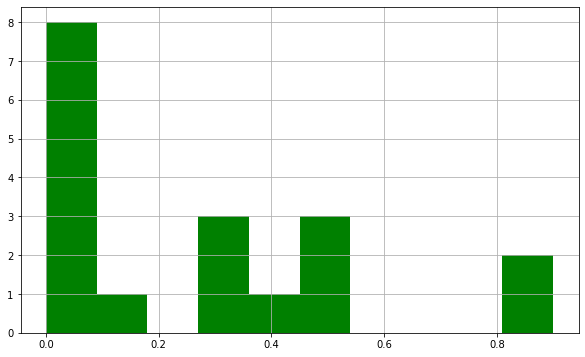

In [249]:

plt.figure(figsize = (10,6))
pharma_news['Subjectivity'].hist(color = 'green')

In [250]:
sia = SentimentIntensityAnalyzer()

pharma_news['Compound'] = [sia.polarity_scores(v)['compound'] for v in pharma_news['Descr']]
pharma_news['Negative'] = [sia.polarity_scores(v)['neg'] for v in pharma_news['Descr']]
pharma_news['Neutral'] = [sia.polarity_scores(v)['neu'] for v in pharma_news['Descr']]
pharma_news['Positive'] = [sia.polarity_scores(v)['pos'] for v in pharma_news['Descr']]
pharma_news

,Descr,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,Less than 2 pc population affected by COVID in...,0.283333,-0.333333,-0.3612,0.226,0.774,0.000
1,SAJA advises news organisations against using ...,0.454545,0.136364,-0.0516,0.091,0.909,0.000
2,Wiley remains committed to expand open access ...,0.350000,0.100000,0.5267,0.000,0.694,0.306
3,Cipla says supply of COVID-19 drug remdesivir ...,0.900000,0.600000,-0.1280,0.130,0.870,0.000
4,"As India eyes Sputnik rollout, experts questio...",0.000000,0.000000,0.0000,0.000,1.000,0.000
5,Over half of FY21 Covid mediclaims filed in ju...,0.166667,-0.166667,0.0000,0.000,1.000,0.000
6,American vaccines effective against Covid stra...,0.377778,0.283333,0.4404,0.084,0.699,0.217
7,Rajnath Singh to release first batch of DRDO's...,0.333333,0.250000,0.0000,0.000,1.000,0.000
8,Alembic Pharma gets USFDA nod for bipolar depr...,0.000000,0.000000,-0.5719,0.316,0.684,0.000
9,Indian variant's transmissibility edge might b...,0.500000,0.000000,-0.4939,0.225,0.775,0.000


In [251]:
ind = []
for index,value in pharma_news.iterrows():
    if value['Polarity'] < 0:
        print("Polarity : {} - {} ".format(value['Polarity'],value['Descr']))
        print("\n")
        ind.append(index)

Polarity : -0.3333333333333333 - Less than 2 pc population affected by COVID in India, 98 pc still vulnerable: Govt 


Polarity : -0.16666666666666666 - Over half of FY21 Covid mediclaims filed in just six weeks 




In [252]:
ind = []
for index,value in pharma_news.iterrows():
    if value['Polarity'] > 0.2:
        print("Polarity : {} - {} ".format(value['Polarity'],value['Descr']))
        print("\n")
        ind.append(index)

Polarity : 0.6 - Cipla says supply of COVID-19 drug remdesivir catching up with demand 


Polarity : 0.2833333333333333 - American vaccines effective against Covid strain first found in India: US officials 


Polarity : 0.25 - Rajnath Singh to release first batch of DRDO's 2DG medicine for treating COVID-19 patients today 


Polarity : 0.5 - Haunted by HIV, top WHO scientist says world must do better on Covid 


Polarity : 0.43333333333333335 - Toxic trade-off: how firing a burst of drugs to kill a virus can make people easy prey for superbugs 




In [253]:
id_to_category

{0: 'auto',
 1: 'banking',
 2: 'pharma',
 3: 'consumer product',
 4: 'energy',
 5: 'entertainment',
 6: 'telecom',
 7: 'metal',
 8: 'infrastructure'}

<h3> Predict News Sector </h3> 

In [254]:
newss = "Indian refineries to reduce crude oil imports in May due to second wave"
newss_ = [newss]

In [255]:
resultt = model.predict(tfidf.transform(newss_))
resultt

array([4], dtype=int64)

<h3> Predict Sentiment </h3> 

In [256]:
getPolarity(newss)

-0.27499999999999997